In [1]:
# pip install --upgrade seaborn
#pip install statsmodels

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed, randn
from numpy import linalg as la

ingreso = 1.5 + 2 dinero_familia + 3 escolaridad + aleatorio

Recordando. Partimos del **modelo de regresión lineal**:

$$
y = X\beta + \epsilon
$$

$$
  \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n \\
        \end{bmatrix}
        = \begin{bmatrix}
                1 & x_{1,1} & x_{1,2} & \ldots & x_{1,p}\\
                1 & x_{2,1} & x_{2,2} & \ldots & x_{2,p}\\
                \vdots & \vdots & \vdots & \ddots & \vdots\\
                1 & x_{n,1} & x_{n,2} & \ldots & x_{n,p}\\
          \end{bmatrix}  \begin{bmatrix} 
                \beta_{0}\\ 
                \beta_{1}\\
                \ldots \\
                \beta_{p}\\
             \end{bmatrix} + \begin{bmatrix} 
                \epsilon_{1}\\ 
                \epsilon_{2}\\
                \ldots \\
                \epsilon_{n}\\
             \end{bmatrix}
$$

donde (en general) asumimos que $\epsilon \sim \mathcal{N}(0, \sigma^2 I)$.

+ Esto implica que las observaciones **son independientes** y que los errores tienen **varianza constante** (también conocida como *homoscedasticidad*).
+ Es decir: $Cov(\epsilon_i, \epsilon_j) = 0$ para $i \ne j$ $\text{      }$   y  $Var(\epsilon_i | \mathbf x)= \sigma^2$ para toda $i$.

Tenemos que el estimador de Mínimos Cuadrados es:

$$
\hat\beta = (X^{\prime}X)^{-1}X^{\prime}y
$$

y los valores predichos o estimados son:

$$
\hat y =  X\hat\beta
$$

+ La suma de cuadrados del error (SSE) se define como $SSE = \sum_i (y_i - \hat y_i)^2 $
+ La suma de cuadrados totales (SST) se define como $SST = \sum_i (y_i - \bar y)^2 $ 
+ Al estadístico:

$$
R^2 = 1 - \frac{SSE}{SST}
$$

se le conoce como coeficiente de determinación, y mide el porcentaje de la variabilidad de los datos que es explicada por el modelo.

## Regresión Lineal usando `scikit-learn`

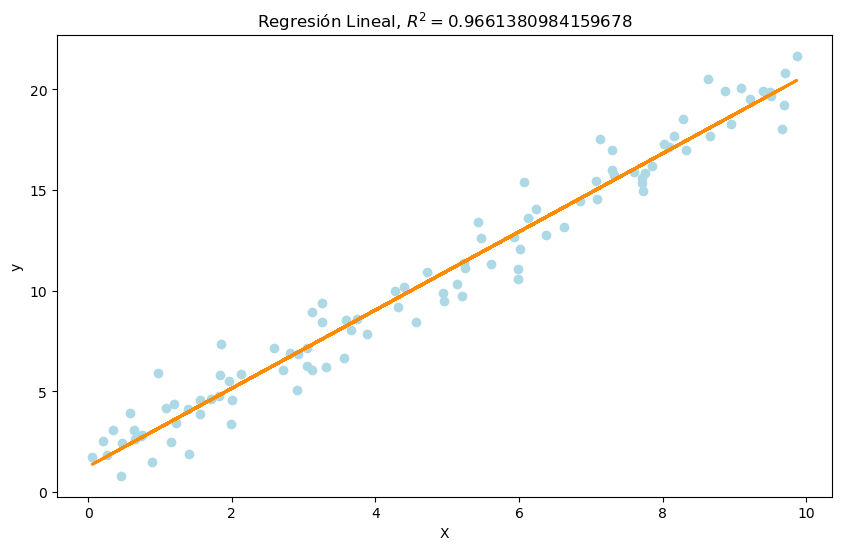

SSR 3313.906597563292
SST 3430.0547747745463
R^2 0.9661380984159678




[1.25811539]    [[1.94482721]]


In [3]:
from sklearn.linear_model import LinearRegression

#1. Simulamos el proceso o fenómeno que da origen a los datos:
np.random.seed(42) #reproducibilidad

beta_0, beta_1 = 1,2 #definiendo los coeficientes "reales"

x = np.random.rand(100, 1)*10 #variable predictora
y = beta_0 + beta_1*x + np.random.randn(100, 1)*1.2  # Con esto estoy diciendo que y = 1 + 2x + error aleatorio

# 2. Usando LinearRegression() para ajustar un modelo de regresión:
model = LinearRegression().fit(x,y) 

#sacando coeficientes y compararlos con los 'reales'.
coeficientes = model.coef_
intercepto = model.intercept_

#calculando las predicciones:
y_pred = model.predict(x)

# 3. Calculando SSR (suma de cuadrados de la regresion), SST (suma de cuadrados totales) y R^2:

y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2) #varianza total en los datos
SSR = np.sum((y_pred - y_mean)**2) #varainza explicada o capturada por el modelo
SSE = np.sum((y -y_pred)**2)
R_squared = 1 - SSE/SST  #porcentaje de variabilidad explicada por el modelo.


# 4. Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x,y, color = 'lightblue', label = 'Datos')
plt.plot(x,y_pred, color = 'darkorange' , linewidth = 2, label = 'Recta de Regresión')

# titulos, leyenda, ejes:
plt.title(f'Regresión Lineal, $R^2 = {R_squared}$')
plt.xlabel ('X')
plt.ylabel ('y')
plt.show()

# Imprimir valores calculados:
print("SSR", SSR)
print("SST", SST)
print("R^2", R_squared)
print("\n"*3)
print(intercepto, "  ", coeficientes)



In [4]:
beta_0, beta_1

(1, 2)

In [5]:
model.score(x,y) #me da directo la R^2

0.9661380984159678

In [6]:
# Calculando b_hat = (X'X)^(-1)X'y

In [7]:
x.shape

(100, 1)

In [8]:
X = np.hstack((np.ones((100,1)), x))
X

array([[1.        , 3.74540119],
       [1.        , 9.50714306],
       [1.        , 7.31993942],
       [1.        , 5.98658484],
       [1.        , 1.5601864 ],
       [1.        , 1.5599452 ],
       [1.        , 0.58083612],
       [1.        , 8.66176146],
       [1.        , 6.01115012],
       [1.        , 7.08072578],
       [1.        , 0.20584494],
       [1.        , 9.69909852],
       [1.        , 8.32442641],
       [1.        , 2.12339111],
       [1.        , 1.81824967],
       [1.        , 1.8340451 ],
       [1.        , 3.04242243],
       [1.        , 5.24756432],
       [1.        , 4.31945019],
       [1.        , 2.9122914 ],
       [1.        , 6.11852895],
       [1.        , 1.39493861],
       [1.        , 2.92144649],
       [1.        , 3.66361843],
       [1.        , 4.56069984],
       [1.        , 7.85175961],
       [1.        , 1.99673782],
       [1.        , 5.14234438],
       [1.        , 5.92414569],
       [1.        , 0.46450413],
       [1.

In [9]:
# Calculando b_hat = (X'X)^(-1)X'y
la.inv(X.T@X)@X.T@y #comprobando la fórmila del estimador MCO

array([[1.25811539],
       [1.94482721]])

In [10]:
print(intercepto, coeficientes) #los que obtuvimos de LinearRegression

[1.25811539] [[1.94482721]]


In [11]:
#Si tuviéramos un nuevo valor de x, digamos x_new, nuestra predicción del modelo sería 1.258 + 1.944 x_new

## Regresión lineal con datos reales
Una regresión lineal, aunque un modelo relativamente simple, nos da la oportunidad de poder interpretar los resultados obtenidos, al problema que se está trabajando. 

Considerando el dataset `california_housing` con el precio de las casas en California.

In [12]:
from sklearn.datasets import fetch_california_housing

In [13]:
housing = fetch_california_housing(as_frame=True) # para que nos permita verlo como un DF.
print(housing.DESCR)
print(housing.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [15]:
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [16]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
df = housing.frame
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Vamos a utilizar la función `scatterplot()` de la librería seaborn (`sns`) en conjunto con pyplot (`plt`) de matplotlib para visualizar la relación entre algunas variables.

* Vamos a crear un gráfico de dispersión con:
  
1. **`sns.scatterplot`**. Se utiliza para mostrar puntos de datos en un gráfico bidimensional, como coordenadas (x,y). Los parámetros utilizados en esta función son:

- `data`: Especifica el DataFrame que contiene los datos a  graficar.
   - `x`: El nombre de la columna en `data` que contiene los valores para el eje x.
   - `y`: El nombre de la columna en `data` que contiene los valores para el eje y.
   - `size`: El nombre de la columna en `data` que determina el tamaño de cada punto en el gráfico. Esto hace que el tamaño de los puntos varíe basado en su valor; permite una dimensión adicional para ser visualizada.
   - `hue`: El nombre de la columna en `data` que determina el color de cada punto en el gráfico de dispersión. Este parámetro colorea los puntos basado en su valor, proporcionando una pista visual de su magnitud.
   - `palette`: Define la paleta de colores utilizada.
   - `alpha`: Especifica el nivel de transparencia / opacidad de los puntos, con 0 siendo completamente transparente y 1 siendo completamente opaco.
2. **`plt.legend`**: para añadir una leyenda, cuyos parámetros son:
   - `title`: Establece el título.
   - `bbox_to_anchor`: Determina la posición de la leyenda en el gráfico. Es una tupla de la forma `(x, y)` donde `x` y `y` especifican la posición de la leyenda relativa.
   - `loc`: Especifica la ubicación del ancla de la leyenda. "upper left" significa que la esquina superior izquierda de la caja de la leyenda se colocará en la posición definida por `bbox_to_anchor`.

3. **`plt.title`**: Esta función establece el título del gráfico.


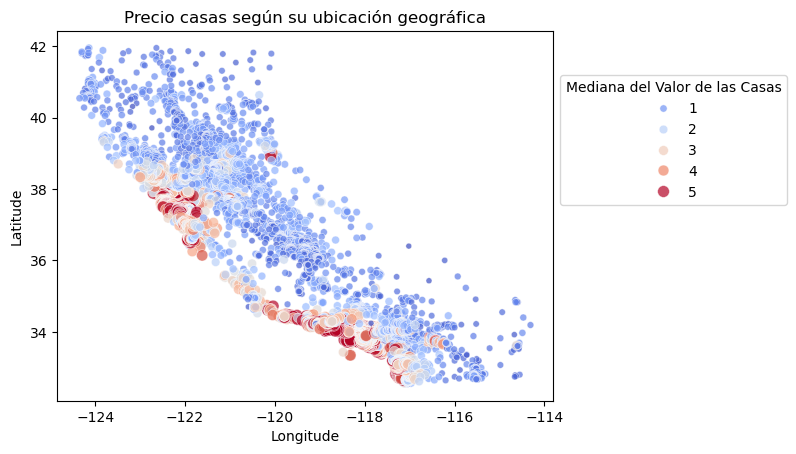

In [19]:
#Veamos la relación entre ubicación geográfica y valor de las casas.

sns.scatterplot(data = df, x = 'Longitude', y= 'Latitude', size = "MedHouseVal", hue = "MedHouseVal",
               palette = "coolwarm", alpha =0.7)
plt.legend(title = "Mediana del Valor de las Casas", bbox_to_anchor = (1, 0.9),
          loc = "upper left")
_ = plt.title('Precio casas según su ubicación geográfica')


#### Uso de la función `corr()` de un df y `heatmap()` de seaborn

corr() es para ver correlaciones, y heatmap() para visualmente resaltarlas meidante un 'mapa de calor'

In [20]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


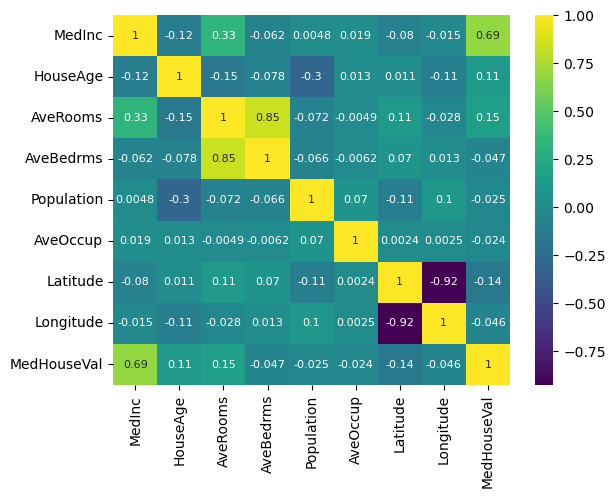

In [21]:
# Ahora vamos a ver el grado se asociación, en particular de asociación lineal entre nuestras variables:
_ = sns.heatmap(df.corr(), annot=True, cmap = 'viridis', annot_kws = {"size":8})

In [22]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


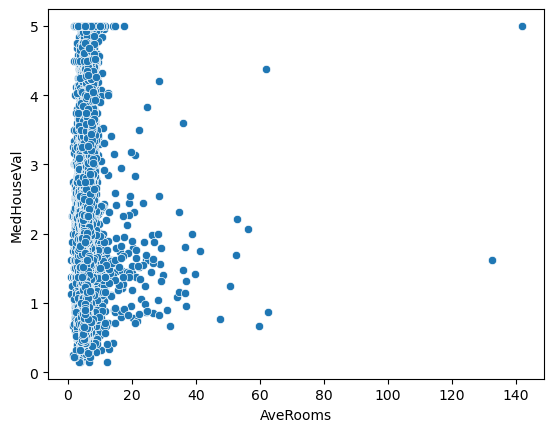

In [23]:
_ = sns.scatterplot(data = df , x = "AveRooms", y="MedHouseVal")

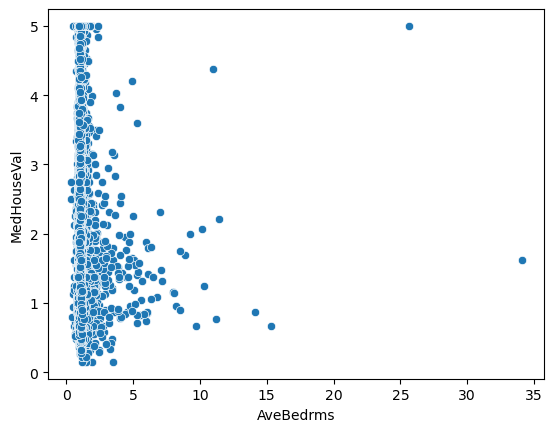

In [24]:
_ = sns.scatterplot(data = df , x = "AveBedrms", y="MedHouseVal")

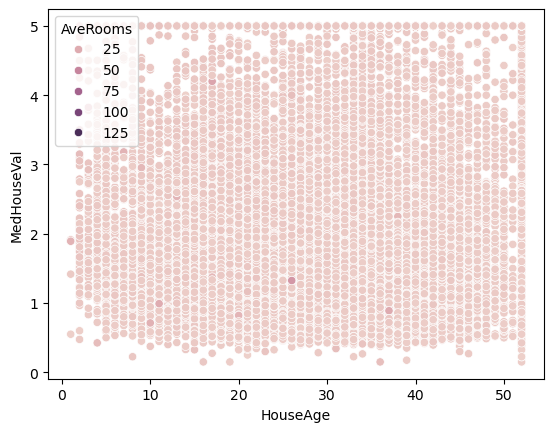

In [25]:
_ = sns.scatterplot(data=df, x= 'HouseAge', y='MedHouseVal', hue = 'AveRooms')

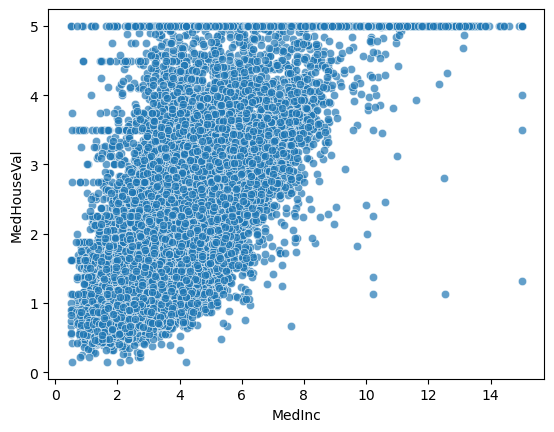

In [26]:
_ = sns.scatterplot(data=df, x="MedInc", y="MedHouseVal", alpha= 0.7)

In [27]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [28]:
model = LinearRegression()
X = housing.data
y = housing.target
model.fit(X,y)

LinearRegression()

In [29]:
model.intercept_ #nos da el intercepto (beta_0)

-36.94192020718431

In [30]:
model.coef_ #nos da los coeficientes de regresión (pendiente de la recta)

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [31]:
y_pred = model.predict(X) #y_hat = X beta_hat

In [32]:
len(y)

20640

In [33]:
#Calculando Sumas de Cuadrados
y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2) #varianza total en los datos
SSR = np.sum((y_pred - y_mean)**2) #varainza explicada o capturada por el modelo
SSE = np.sum((y -y_pred)**2)
R_squared = 1 - SSE/SST
R_squared

0.606232685199805

In [34]:
model.score(X,y)

0.606232685199805

In [35]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [36]:
for var_name, coef in zip(housing.feature_names, model.coef_):
    print(var_name, coef)

MedInc 0.4366932931343263
HouseAge 0.009435778033238711
AveRooms -0.10732204139090447
AveBedrms 0.6450656935198146
Population -3.9763894212360005e-06
AveOccup -0.0037865426549708687
Latitude -0.4213143775271416
Longitude -0.4345137546747759


Lo anterior quiere dcir que:

MedHouseVal = 0.436 x MedInc + 0.009 x HouseAge - 0.107 x AveRooms+...-0.434 x Longitude

In [37]:
# Debe dar lo mismo que nuestro estimador de MCO:
Z = np.hstack((np.ones((len(y),1)), X))
la.inv(Z.T@Z)@Z.T@y

array([-3.69419202e+01,  4.36693293e-01,  9.43577803e-03, -1.07322041e-01,
        6.45065694e-01, -3.97638942e-06, -3.78654265e-03, -4.21314378e-01,
       -4.34513755e-01])

## Usando OLS (ordinary least squares) para una regresión lineal


In [38]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
import statsmodels.api as sm
#importante: OLS supone que NO hay intercepto
X = sm.add_constant(X) # LE ESTAMOS AGREGANDO UNA PRIMERA COLUMNA DE UNOS. 
model = sm.OLS(y, X)
results = model.fit() #aquí se ejecuta la regresión lineal
results.params #para obtener los coeficientes de regresion


const        -36.941920
MedInc         0.436693
HouseAge       0.009436
AveRooms      -0.107322
AveBedrms      0.645066
Population    -0.000004
AveOccup      -0.003787
Latitude      -0.421314
Longitude     -0.434514
dtype: float64

In [40]:
results.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:44:48   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#comentarios:
# num cond = sqrt(eig_max/eig_min), donde eig_max es el eigenvalor más grande de (X'X) eig_min el eigenvalor más pequeño

In [41]:
y_pred = results.predict(X)
residuals = y - y_pred  #son un estimador de los errores
res_squared = residuals**2
ssres = res_squared.sum()
mse = ssres/len(y) # "mean suared error" = error cuadrático medio
rmse = np.sqrt(mse)
rmse

0.7241001216576386

In [42]:
df_res = [residuals, y_pred]
df_res = pd.DataFrame(df_res).T
df_res.columns = ["residuals","y_pred"]

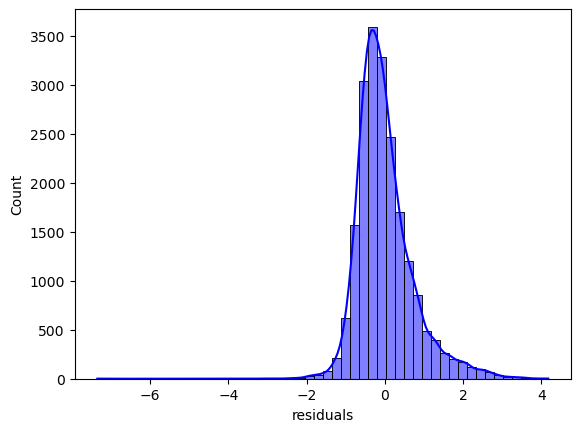

In [43]:
_ = sns.histplot(data = df_res, x="residuals", bins= 50, kde=True, color="blue")

In [45]:
df_res.residuals.mean()

-1.4237844322994443e-13

En relación a **F-statistic** y **Prob (F-statistic)**:

* Se utiliza para determinar si existe una relación lineal significativa entre la variable respuesta y el conjunto de variables predictoras.

Prueba la hipótesis nula de que todos los coeficientes de regresión en el modelo (excepto el intercepto) son iguales a cero, lo que implicaría que las predictoras no explican nada de la variabilidad en la variable respuesta.

### Hipótesis Nula ($H_0$):
- $H_0$: $\beta_1 = \beta_2 = ... = \beta_k = 0$, donde $\beta_1, \beta_2, ..., \beta_k$ son los coeficientes de regresión

### Hipótesis Alternativa ($H_a$):
- $H_a$: Al menos un $\beta_i$ no es igual a cero ($i \in \{1, 2, ..., k\}$).

### Formulación de la prueba F:
El estadístico F se calcula utilizando la proporción de dos varianzas:

1. **Cuadrado Medio de la Regresión (MSR)**: La varianza explicada por el modelo de regresión. Se calcula dividiendo la Suma de Cuadrados de la Regresión (SSR) entre los grados de libertad del modelo ($df_{modelo}$), que es el número de variables predictoras.
   
   $MSR = \frac{SSR}{df_{modelo}}$

2. **Cuadrado Medio del Residuo (MSE)**: La varianza NO explicada por el modelo, también conocida como " error cuadrado medio". Se calcula dividiendo la Suma de Cuadrados del Residuo (SSE) entre los grados de libertad asociados con los residuos ($df_{residuos}$), que es el número de observaciones menos el número de parámetros estimados.
   
   $MSE = \frac{SSE}{df_{residuos}}$

3. **Estadístico F**:
   
   $F = \frac{MSR}{MSE}$

### Interpretación:
- **Si el estadístico F es significativamente grande**, indica que la varianza capturada por el modelo es significativamente mayor que la varianza no explicada por el modelo, llevando al rechazo de la hipótesis nula. Esto sugiere que el modelo, con al menos una de sus variables predictores, proporciona un mejor ajuste a los datos que un modelo sin predictoras (aparte del intercepto).
- **Si el estadístico F es pequeño**, sugiere que el modelo no proporciona un ajuste significativamente mejor a los datos que un modelo sin predictores, y hay evidencia insuficiente para NO rechazar la hipótesis nula.

La prueba F viene con un valor p, que ayuda en la toma de decisiones:
- Un **valor p pequeño** ($\leq$ un nivel de significancia, por ejemplo, 0.05) indica una fuerte evidencia contra la hipótesis nula, por lo que se rechaza $H_0$.
- Un **valor p grande** (> nivel de significancia) sugiere evidencia débil contra $H_0$, por lo que no se rechaza $H_0$.


In [ ]:
# colinealidad

In [ ]:
# residuales

La prueba t  (en el contexto del análisis de regresión) se utiliza para determinar si cada coeficiente de regresión es significativamente diferente de cero. Esto significa que la prueba evalúa si la variable predictora correspondiente tiene una relación estadísticamente significativa con la variable dependiente. Se formula de la siguiente manera:

### Hipótesis Nula y Alternativa:
- **Hipótesis Nula ($H_0$)**:  El coeficiente de regresión ($\beta_i$) es igual a cero, indicando que el predictor $X_i$ no tiene una relación estadísticamente significativa con la variable dependiente $Y$.
  
  $H_0: \beta_i = 0$
  
- **Hipótesis Alternativa ($H_a$)**: La hipótesis alternativa afirma que el coeficiente de regresión no es igual a cero, sugiriendo que el predictor tiene una relación significativa con la variable respuesta.
  
  $H_a: \beta_i \neq 0$

### Cálculo del Estadístico t:
El estadístico t para un coeficiente de regresión se calcula dividiendo el coeficiente estimado por su error estándar:

$$ t = \frac{\hat{\beta_i} - 0}{SE(\hat{\beta_i})}$$

donde:
- $\hat{\beta_i}$ es el coeficiente estimado para el predictor $X_i$,
- $SE(\hat{\beta_i})$ es la desviación estándar del coeficiente estimado.

El denominador representa el error estándar del coeficiente, que mide la variabilidad o incertidumbre en la estimación de $\beta_i$.

### Interpretación:
- **Valor del Estadístico t**: La magnitud del estadístico t indica cuántos errores estándar está el coeficiente alejado de cero. Un valor absoluto grande del estadístico t sugiere que es poco probable que el verdadero coeficiente sea cero, llevando al rechazo de la hipótesis nula.
- **Valor p**: El valor p asociado con el estadístico t nos dice la probabilidad de observar tal estadístico (o uno más extremo) si la hipótesis nula fuera cierta. Un valor p pequeño (típicamente ≤ 0.05) indica una fuerte evidencia contra la hipótesis nula, sugiriendo que el coeficiente es significativamente diferente de cero.

In [46]:
boston = pd.read_csv('boston_house_prices.csv')
boston.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,A1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,A2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,A3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,A4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,A5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Significado variables
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in '$1000s

In [47]:
X = boston.loc[:, 'CRIM':'LSTAT']
y = boston['MEDV']

In [48]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

In [51]:
boston.loc[:, 'CRIM':].corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          6.72e-135
Time:                        21:54:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""